# Load data and keep 2019 timepoint

In [55]:
import pandas as pd

df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean.csv')

df_covid_AP.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace = True)
df_covid_AP = df_covid_AP.rename(columns={"PM2.5_annualMean": "PM2_5_annualMean", "Fully vaccinated": "Fully_vaccinated", "Population density": "Population_density"})

In [56]:
df_covid_AP.shape

(4000, 23)

In [57]:
df_covid_AP.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'Fully_vaccinated', 'Population_density'],
      dtype='object')

In [58]:
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP_2019 = df_covid_AP[0:400]

# Analyze distribution of features and targets

In [59]:
# keep useful features only
df_covid_AP_2019 = df_covid_AP_2019[['county', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

In [60]:
#numerical features
feature_list = ['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']

In [61]:
target_list = ['cases_per_100k', 'deaths_per_100k']

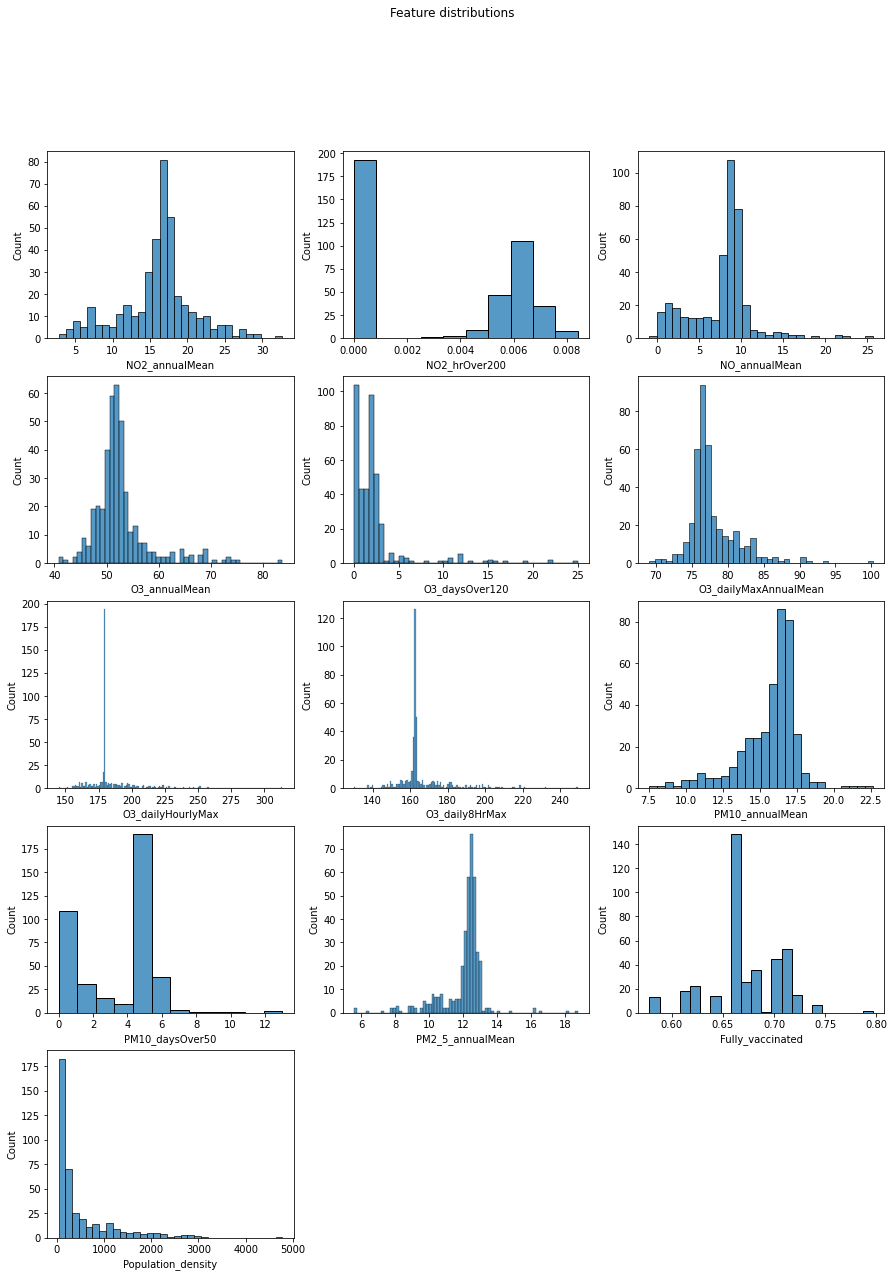

In [62]:
#check distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

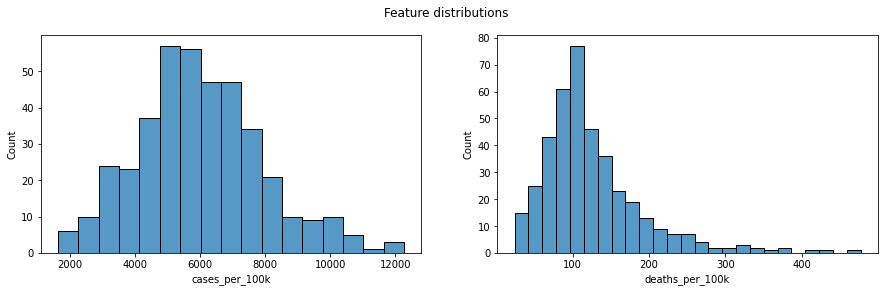

In [63]:
#check distribution of targets

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

for i, feature in enumerate(target_list):
    # First subplot
    plt.subplot(1,2,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

# Visual analysis of feature-target correlation

## Target: deaths per 100k

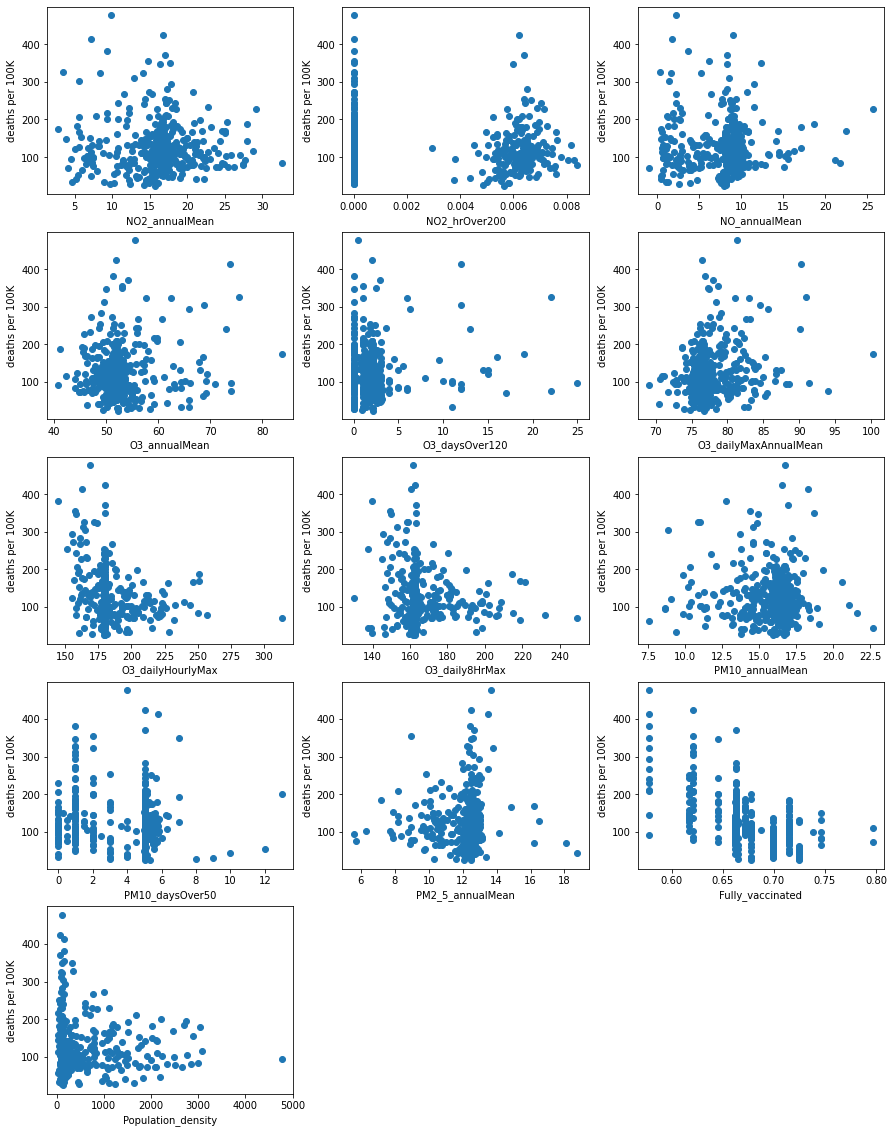

In [64]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    plt.scatter(df_covid_AP_2019[feature], df_covid_AP_2019['deaths_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("deaths per 100K")
    # Global figure methods
plt.show()

## Target: cases per 100k

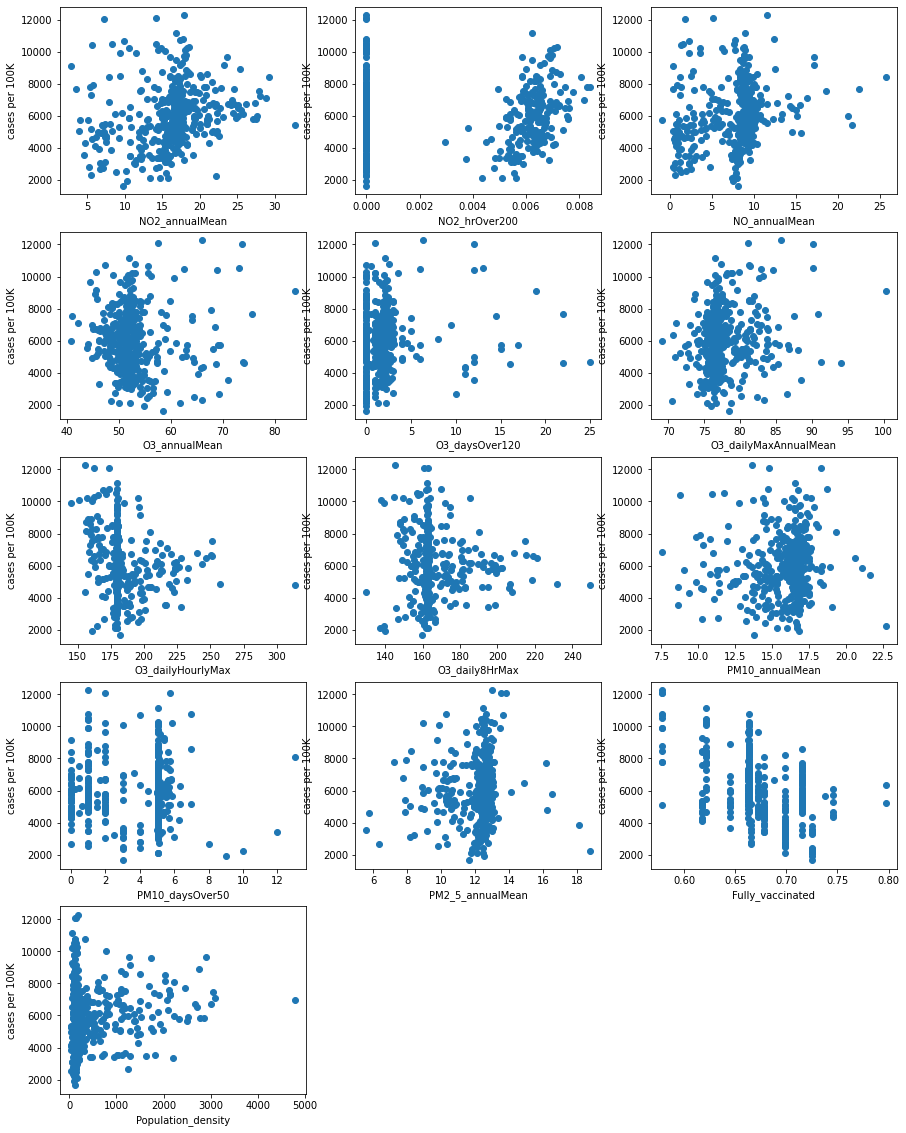

In [65]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    plt.scatter(df_covid_AP_2019[feature], df_covid_AP_2019['cases_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("cases per 100K")
    # Global figure methods
plt.show()

## Correlation plot

<AxesSubplot:>

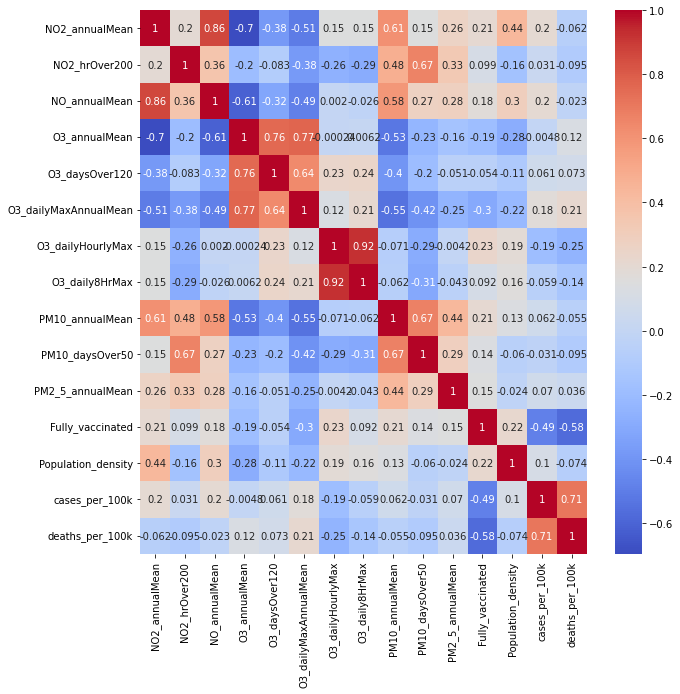

In [66]:
import seaborn as sns
plt.figure(figsize = (10,10))

sns.heatmap(df_covid_AP_2019.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

# Linear regression: deaths per 100k

## Univariate linear regression

In [67]:
import statsmodels.formula.api as smf

### Vaccination status

In [72]:
model = smf.ols(formula = 'deaths_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     198.8
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.67e-37
Time:                        11:54:31   Log-Likelihood:                -2172.0
No. Observations:                 400   AIC:                             4348.
Df Residuals:                     398   BIC:                             4356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          873.8201     53.133     16.446      0.000     769.363     978.277
Fully_vaccinated -1112.4698     78.899    -14.100      0.000   -1267.580    -957.359
==============================================================================
Omnibus:                       93.260   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.962
Skew:                           1.190   Prob(JB):                     6.94e-46
Kurtosis:                       5.611   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Population density

In [73]:
model = smf.ols(formula = 'deaths_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.166
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.142
Time:                        11:55:03   Log-Likelihood:                -2252.0
No. Observations:                 400   AIC:                             4508.
Df Residuals:                     398   BIC:                             4516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            129.4864      4.264     30.364      0.000     121.103     137.870
Population_density    -0.0072      0.005     -1.472      0.142      -0.017       0.002
==============================================================================
Omnibus:                      147.676   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.709
Skew:                           1.697   Prob(JB):                    9.20e-106
Kurtosis:                       7.183   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### NO2

In [75]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.513
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.219
Time:                        11:58:48   Log-Likelihood:                -2252.3
No. Observations:                 400   AIC:                             4509.
Df Residuals:                     398   BIC:                             4517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        139.6672     11.882     11.755      0.000     116.308     163.026
NO2_annualMean    -0.8718      0.709     -1.230      0.219      -2.265       0.522
==============================================================================
Omnibus:                      146.022   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.285
Skew:                           1.680   Prob(JB):                    1.02e-103
Kurtosis:                       7.143   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### NO 

In [76]:
model = smf.ols(formula = 'deaths_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2121
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.645
Time:                        11:59:11   Log-Likelihood:                -2253.0
No. Observations:                 400   AIC:                             4510.
Df Residuals:                     398   BIC:                             4518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       128.9422      7.893     16.336      0.000     113.425     144.459
NO_annualMean    -0.4257      0.924     -0.461      0.645      -2.243       1.392
==============================================================================
Omnibus:                      150.597   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.003
Skew:                           1.724   Prob(JB):                    2.19e-110
Kurtosis:                       7.291   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ozon

In [78]:
model = smf.ols(formula = 'deaths_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.893
Date:                Wed, 24 Nov 2021   Prob (F-statistic):             0.0156
Time:                        11:59:39   Log-Likelihood:                -2250.1
No. Observations:                 400   AIC:                             4504.
Df Residuals:                     398   BIC:                             4512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        45.9357     33.014      1.391      0.165     -18.968     110.839
O3_annualMean     1.5107      0.622      2.427      0.016       0.287       2.734
==============================================================================
Omnibus:                      141.073   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.758
Skew:                           1.627   Prob(JB):                     5.90e-98
Kurtosis:                       7.034   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PM2.5

In [79]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.471
Time:                        11:59:59   Log-Likelihood:                -2252.8
No. Observations:                 400   AIC:                             4510.
Df Residuals:                     398   BIC:                             4518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          104.1470     30.038      3.467      0.001      45.094     163.200
PM2_5_annualMean     1.7848      2.476      0.721      0.471      -3.083       6.653
==============================================================================
Omnibus:                      150.330   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.425
Skew:                           1.721   Prob(JB):                    4.81e-110
Kurtosis:                       7.285   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PM10

In [80]:
model = smf.ols(formula = 'deaths_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.210
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.272
Time:                        12:00:56   Log-Likelihood:                -2252.5
No. Observations:                 400   AIC:                             4509.
Df Residuals:                     398   BIC:                             4517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         154.7858     26.699      5.797      0.000     102.296     207.275
PM10_annualMean    -1.8577      1.689     -1.100      0.272      -5.178       1.463
==============================================================================
Omnibus:                      152.501   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.876
Skew:                           1.734   Prob(JB):                    6.42e-115
Kurtosis:                       7.418   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multivariate linear regression

In [74]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     36.42
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.73e-35
Time:                        11:56:36   Log-Likelihood:                -2164.6
No. Observations:                 400   AIC:                             4343.
Df Residuals:                     393   BIC:                             4371.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            746.6619     76.387      9.775      0.000     596.484     896.840
NO2_annualMean         0.8525      0.949      0.899      0.369      -1.013       2.718
O3_annualMean          1.2524      0.722      1.735      0.084      -0.167       2.672
PM10_annualMean        1.0605      1.917      0.553      0.580      -2.708       4.829
PM2_5_annualMean       5.6420      2.255      2.502      0.013       1.208      10.076
Fully_vaccinated   -1172.7138     81.807    -14.335      0.000   -1333.548   -1011.880
Population_density     0.0062      0.005      1.339      0.181      -0.003       0.015
==============================================================================
Omnibus:                       89.348   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.400
Skew:                           1.129   Prob(JB):                     4.12e-45
Kurtosis:                       5.676   Cond. No.                     3.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear regression: cases per 100k

## Univariate linear regression

### Vaccination status

In [81]:
model = smf.ols(formula = 'cases_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     126.5
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.15e-25
Time:                        12:11:51   Log-Likelihood:                -3538.3
No. Observations:                 400   AIC:                             7081.
Df Residuals:                     398   BIC:                             7089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.418e+04   1617.291     14.952      0.000     2.1e+04    2.74e+04
Fully_vaccinated -2.701e+04   2401.549    -11.246      0.000   -3.17e+04   -2.23e+04
==============================================================================
Omnibus:                        9.286   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.798
Skew:                           0.203   Prob(JB):                       0.0334
Kurtosis:                       2.507   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Population density

In [82]:
model = smf.ols(formula = 'cases_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.040
Date:                Wed, 24 Nov 2021   Prob (F-statistic):             0.0451
Time:                        12:12:09   Log-Likelihood:                -3591.5
No. Observations:                 400   AIC:                             7187.
Df Residuals:                     398   BIC:                             7195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5869.5127    121.397     48.350      0.000    5630.854    6108.172
Population_density     0.2813      0.140      2.010      0.045       0.006       0.556
==============================================================================
Omnibus:                       19.867   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.482
Skew:                           0.532   Prob(JB):                     2.16e-05
Kurtosis:                       3.397   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### NO2

In [84]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.55
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.71e-05
Time:                        12:12:25   Log-Likelihood:                -3585.4
No. Observations:                 400   AIC:                             7175.
Df Residuals:                     398   BIC:                             7183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4720.2290    332.824     14.182      0.000    4065.917    5374.541
NO2_annualMean    80.7870     19.856      4.069      0.000      41.751     119.823
==============================================================================
Omnibus:                       32.343   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.625
Skew:                           0.684   Prob(JB):                     4.10e-09
Kurtosis:                       3.669   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### NO 

In [85]:
model = smf.ols(formula = 'cases_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.74
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.18e-05
Time:                        12:12:30   Log-Likelihood:                -3585.3
No. Observations:                 400   AIC:                             7175.
Df Residuals:                     398   BIC:                             7183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5202.6924    220.683     23.575      0.000    4768.842    5636.543
NO_annualMean   105.7640     25.846      4.092      0.000      54.952     156.576
==============================================================================
Omnibus:                       28.026   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.628
Skew:                           0.625   Prob(JB):                     8.22e-08
Kurtosis:                       3.630   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ozon

In [86]:
model = smf.ols(formula = 'cases_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.009209
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.924
Time:                        12:12:36   Log-Likelihood:                -3593.5
No. Observations:                 400   AIC:                             7191.
Df Residuals:                     398   BIC:                             7199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6108.9032    948.952      6.438      0.000    4243.317    7974.489
O3_annualMean    -1.7166     17.889     -0.096      0.924     -36.885      33.452
==============================================================================
Omnibus:                       14.642   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.206
Skew:                           0.458   Prob(JB):                     0.000499
Kurtosis:                       3.268   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PM2.5

In [87]:
model = smf.ols(formula = 'cases_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.947
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.164
Time:                        12:12:41   Log-Likelihood:                -3592.5
No. Observations:                 400   AIC:                             7189.
Df Residuals:                     398   BIC:                             7197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4832.1621    855.569      5.648      0.000    3150.163    6514.161
PM2_5_annualMean    98.4119     70.532      1.395      0.164     -40.249     237.073
==============================================================================
Omnibus:                       13.223   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.595
Skew:                           0.437   Prob(JB):                      0.00112
Kurtosis:                       3.230   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PM10

In [88]:
model = smf.ols(formula = 'cases_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.540
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.215
Time:                        12:12:45   Log-Likelihood:                -3592.7
No. Observations:                 400   AIC:                             7189.
Df Residuals:                     398   BIC:                             7197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5080.7603    761.524      6.672      0.000    3583.649    6577.872
PM10_annualMean    59.7965     48.178      1.241      0.215     -34.918     154.511
==============================================================================
Omnibus:                       15.420   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.121
Skew:                           0.465   Prob(JB):                     0.000316
Kurtosis:                       3.317   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multivariate linear regression

In [89]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     39.56
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.34e-37
Time:                        12:12:50   Log-Likelihood:                -3499.0
No. Observations:                 400   AIC:                             7012.
Df Residuals:                     393   BIC:                             7040.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.916e+04   2146.757      8.926      0.000    1.49e+04    2.34e+04
NO2_annualMean       157.3974     26.665      5.903      0.000     104.973     209.821
O3_annualMean         73.3012     20.288      3.613      0.000      33.415     113.187
PM10_annualMean       -0.8714     53.865     -0.016      0.987    -106.772     105.029
PM2_5_annualMean     125.7227     63.378      1.984      0.048       1.120     250.325
Fully_vaccinated   -3.155e+04   2299.082    -13.723      0.000   -3.61e+04    -2.7e+04
Population_density     0.3330      0.129      2.577      0.010       0.079       0.587
==============================================================================
Omnibus:                        8.669   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.625
Skew:                           0.352   Prob(JB):                       0.0134
Kurtosis:                       3.147   Cond. No.                     3.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# KNN